# Candlestick Hikkake

https://www.investopedia.com/terms/h/hikkakepattern.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2018-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


## Candlestick with Hikkake

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,10.42,11.02,10.34,10.98,10.98,44146300,True
1,736697.0,11.61,12.14,11.36,11.55,11.55,154066700,False
2,736698.0,12.10,12.43,11.97,12.12,12.12,109503000,True
3,736699.0,12.19,12.22,11.66,11.88,11.88,63808900,False
4,736702.0,12.01,12.30,11.85,12.28,12.28,63346000,True


Text(0, 0.5, 'Price')

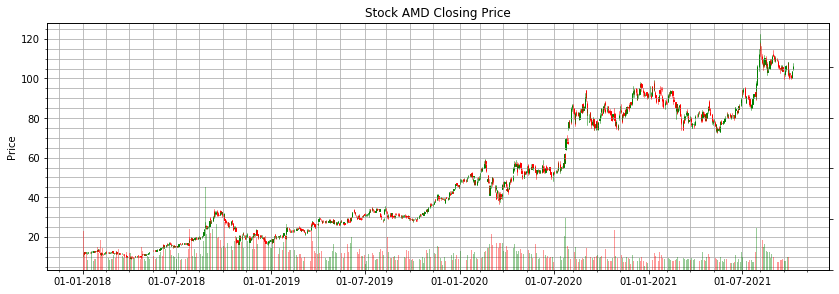

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
hikkake = talib.CDLHIKKAKE(df['Open'], df['High'], df['Low'], df['Close'])

hikkake = hikkake[hikkake != 0]

In [6]:
df['hikkake'] = talib.CDLHIKKAKE(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['hikkake'] !=0]

,Open,High,Low,Close,Adj Close,Volume,hikkake
Date,,,,,,,
2018-01-18,12.180000,12.680000,12.150000,12.470000,12.470000,62086200,-100
2018-02-02,13.050000,13.060000,12.430000,12.450000,12.450000,79432600,100
2018-02-07,11.700000,11.900000,11.530000,11.600000,11.600000,55758400,-100
2018-02-22,11.820000,12.000000,11.630000,11.840000,11.840000,37886300,100
2018-02-26,12.140000,12.430000,12.050000,12.420000,12.420000,42265200,200
...,...,...,...,...,...,...,...
2021-08-13,107.169998,111.709999,106.570000,110.550003,110.550003,100059200,-100
2021-08-18,107.349998,108.070000,103.269997,103.440002,103.440002,79387900,-200
2021-08-23,105.300003,109.019997,104.860001,108.769997,108.769997,68835300,-100


In [8]:
df['Adj Close'].loc[df['hikkake'] !=0]

Date
2018-01-18     12.470000
2018-02-02     12.450000
2018-02-07     11.600000
2018-02-22     11.840000
2018-02-26     12.420000
                 ...    
2021-08-13    110.550003
2021-08-18    103.440002
2021-08-23    108.769997
2021-09-08    106.169998
2021-09-10    105.199997
Name: Adj Close, Length: 128, dtype: float64

In [9]:
df['Adj Close'].loc[df['hikkake'] !=0].index

DatetimeIndex(['2018-01-18', '2018-02-02', '2018-02-07', '2018-02-22',
               '2018-02-26', '2018-03-09', '2018-03-15', '2018-03-22',
               '2018-04-10', '2018-04-12',
               ...
               '2021-06-23', '2021-06-28', '2021-07-02', '2021-07-07',
               '2021-07-14', '2021-08-13', '2021-08-18', '2021-08-23',
               '2021-09-08', '2021-09-10'],
              dtype='datetime64[ns]', name='Date', length=128, freq=None)

In [10]:
hikkake

Date
2018-01-18   -100
2018-02-02    100
2018-02-07   -100
2018-02-22    100
2018-02-26    200
             ... 
2021-08-13   -100
2021-08-18   -200
2021-08-23   -100
2021-09-08    100
2021-09-10    100
Length: 128, dtype: int32

In [11]:
hikkake.index

DatetimeIndex(['2018-01-18', '2018-02-02', '2018-02-07', '2018-02-22',
               '2018-02-26', '2018-03-09', '2018-03-15', '2018-03-22',
               '2018-04-10', '2018-04-12',
               ...
               '2021-06-23', '2021-06-28', '2021-07-02', '2021-07-07',
               '2021-07-14', '2021-08-13', '2021-08-18', '2021-08-23',
               '2021-09-08', '2021-09-10'],
              dtype='datetime64[ns]', name='Date', length=128, freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,hikkake
Date,,,,,,,
2018-01-02,10.420000,11.020000,10.340000,10.980000,10.980000,44146300,0
2018-01-03,11.610000,12.140000,11.360000,11.550000,11.550000,154066700,0
2018-01-04,12.100000,12.430000,11.970000,12.120000,12.120000,109503000,0
2018-01-05,12.190000,12.220000,11.660000,11.880000,11.880000,63808900,0
2018-01-08,12.010000,12.300000,11.850000,12.280000,12.280000,63346000,0
...,...,...,...,...,...,...,...
2021-10-01,102.599998,103.000000,100.639999,102.449997,102.449997,41491600,0
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0


Text(0, 0.5, 'Price')

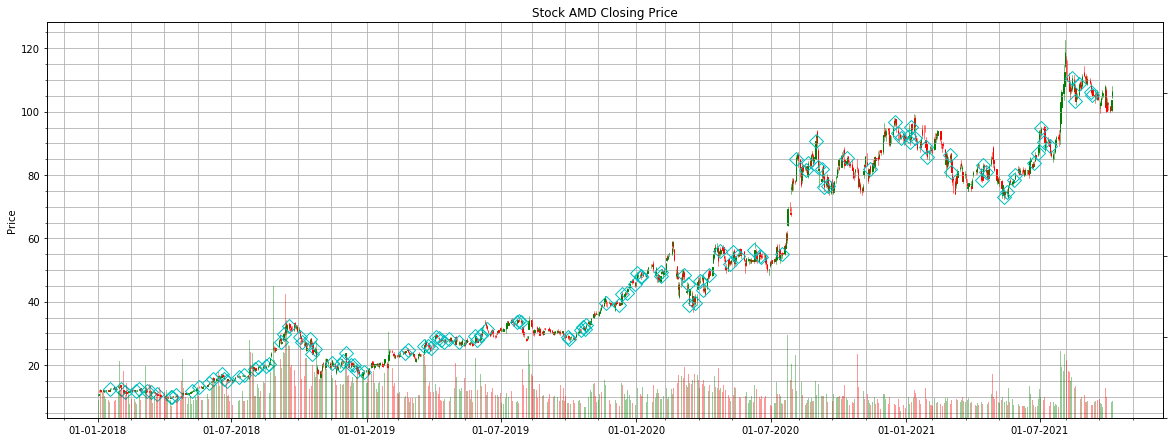

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['hikkake'] !=0].index, df['Adj Close'].loc[df['hikkake'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-08-01':'2021-10-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,hikkake,VolumePositive
0,738004.0,105.930000,110.330002,103.830002,108.629997,108.629997,115581900,0,True
1,738005.0,108.150002,114.849998,107.660004,112.559998,112.559998,157723100,0,True
2,738006.0,114.360001,122.489998,114.160004,118.769997,118.769997,225368700,0,True
3,738007.0,116.629997,117.680000,111.589996,112.349998,112.349998,137860900,0,False
4,738008.0,110.550003,116.260002,109.699997,110.110001,110.110001,143792800,0,False


Text(0, 0.5, 'Price')

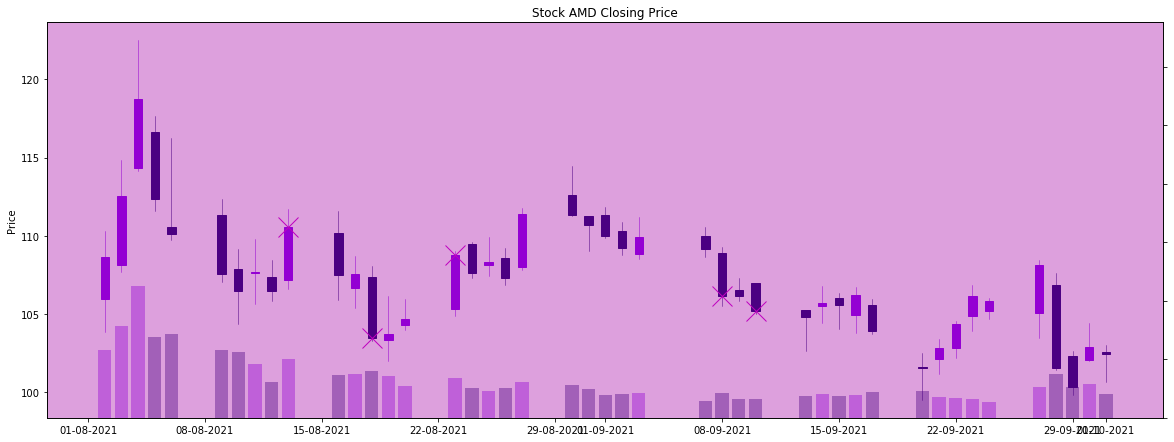

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('plum')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='darkviolet', colordown='indigo', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['hikkake'] !=0].index, df['Adj Close'].loc[df['hikkake'] !=0],
                'xm', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=20.0) 
colors = dfc.VolumePositive.map({True: 'darkviolet', False: 'indigo'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

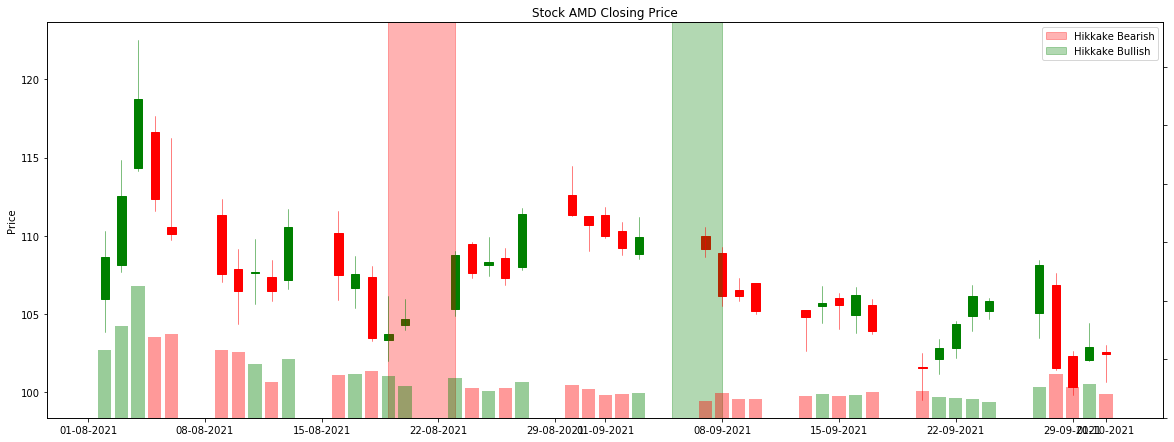

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,8,19)), date2num(datetime(2021,8,23)), 
           label="Hikkake Bearish",color="red", alpha=0.3)
ax.axvspan(date2num(datetime(2021,9,5)), date2num(datetime(2021,9,8)), 
           label="Hikkake Bullish",color="green", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')